In [17]:
# import dependencies 
# label encoding
# split data 
# Make Bag of Words 
# make a model 
# evaluate 
# save 

In [2]:
import pandas as pd 
import numpy as np 
from ast import literal_eval

In [3]:
# load the dataset
directory = 'Kozminski_AI_chat/Word_embeddings/data_reduced/subjects_embeddings.csv' 
df = pd.read_csv(directory)
df['embedding'] = df.embedding.apply(literal_eval).apply(np.array)
df.head(10)

,Category,Question,embedding
0,Educational resources,librarys open hours,"[-0.008088679052889347, 0.00560748903080821, -..."
1,Educational resources,access librarys resources remotely,"[-0.020060865208506584, -0.014022785238921642,..."
2,Educational resources,library regulations borrow book,"[0.0059623559936881065, -0.0011123931035399437..."
3,Educational resources,renew borrow book,"[-0.01162764336913824, -0.021848950535058975, ..."
4,Educational resources,fin late return library materials,"[-0.025956762954592705, -0.0002834359183907509..."
5,Educational resources,request book another library interlibrary loan,"[-0.010385137051343918, -0.011515585705637932,..."
6,Educational resources,type databases available students kozminski un...,"[-0.0025029454845935106, 0.003250154433771968,..."
7,Educational resources,access online databases offcampus,"[-0.011010547168552876, -0.018531490117311478,..."
8,Educational resources,process request article online database,"[-0.011216829530894756, 0.0053767547942698, -0..."
9,Educational resources,workshops train sessions use library resources,"[-0.01877945102751255, 0.0004899293417111039, ..."


In [4]:
# label encoding
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

y_data = label_encoder.fit_transform(df['Category'])
df['Encoded_labels'] = y_data

list_of_labels = df['Category'].unique()
list_of_encoded_labels = df['Encoded_labels'].unique()
print(list_of_encoded_labels, list_of_labels)


[ 4  6  1  7  8  5  0 10  3  2  9] ['Educational resources' 'Open Days' 'Campus' 'Programmes and Degrees'
 'Scholarship\xa0' 'Internship' 'Admissions and Application Process'
 'Study and Internship abroad' 'Double Degree programs' 'Contacts'
 'Student Housing']


In [6]:
labels_dict = {}
for x in range(len(list_of_encoded_labels)):
    labels_dict[f'{list_of_encoded_labels[x]}'] = list_of_labels[x]

labels_dict

{'4': 'Educational resources',
 '6': 'Open Days',
 '1': 'Campus',
 '7': 'Programmes and Degrees',
 '8': 'Scholarship\xa0',
 '5': 'Internship',
 '0': 'Admissions and Application Process',
 '10': 'Study and Internship abroad',
 '3': 'Double Degree programs',
 '2': 'Contacts',
 '9': 'Student Housing'}

In [5]:
# Split data
from sklearn.model_selection import train_test_split

x_data = df['embedding'].values
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=123)

# Convert sparse matrix to dense format
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)


print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

[array([-0.00808868,  0.00560749, -0.02206132, ..., -0.02223146,
         0.02296873, -0.03028469])
 array([-0.02006087, -0.01402279, -0.00060655, ..., -0.00483471,
         0.00575139,  0.00058797])
 array([ 0.00596236, -0.00111239, -0.01698863, ..., -0.01742897,
         0.01130681, -0.01678977])                               ...
 array([ 0.00715765,  0.00147363,  0.00102119, ...,  0.00226478,
         0.00558555, -0.02901088])
 array([ 0.01167676, -0.00632609, -0.0019049 , ...,  0.00020023,
        -0.00374618, -0.0374335 ])
 array([ 0.00471839,  0.00557066, -0.00910001, ..., -0.02067433,
         0.0095605 , -0.01088014])                              ]
Training Data : (3123, 1536)
Testing Data :  (1041, 1536)


In [7]:
# Build the model 

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the number of classes (60 in your case)
num_classes = 11

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(1536,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


2023-09-13 00:32:30.136336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
98/98 [==============================] - 2s 10ms/step - loss: 1.4079 - accuracy: 0.7246 - val_loss: 0.6343 - val_accuracy: 0.8905
Epoch 2/10
98/98 [==============================] - 1s 8ms/step - loss: 0.4397 - accuracy: 0.9039 - val_loss: 0.3304 - val_accuracy: 0.9280
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 0.2653 - accuracy: 0.9324 - val_loss: 0.2576 - val_accuracy: 0.9356
Epoch 4/10
98/98 [==============================] - 1s 9ms/step - loss: 0.1974 - accuracy: 0.9523 - val_loss: 0.2251 - val_accuracy: 0.9481
Epoch 5/10
98/98 [==============================] - 1s 15ms/step - loss: 0.1652 - accuracy: 0.9571 - val_loss: 0.2052 - val_accuracy: 0.9529
Epoch 6/10
98/98 [==============================] - 1s 9ms/step - loss: 0.1348 - accuracy: 0.9651 - val_loss: 0.1894 - val_accuracy: 0.9520
Epoch 7/10
98/98 [==============================] - 1s 9ms/step - loss: 0.1156 - accuracy: 0.9702 - val_loss: 0.1762 - val_accuracy: 0.9597
Epoch 8/10
98/98 [

In [9]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc:.4f}")


33/33 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9587
Validation Accuracy: 0.9587


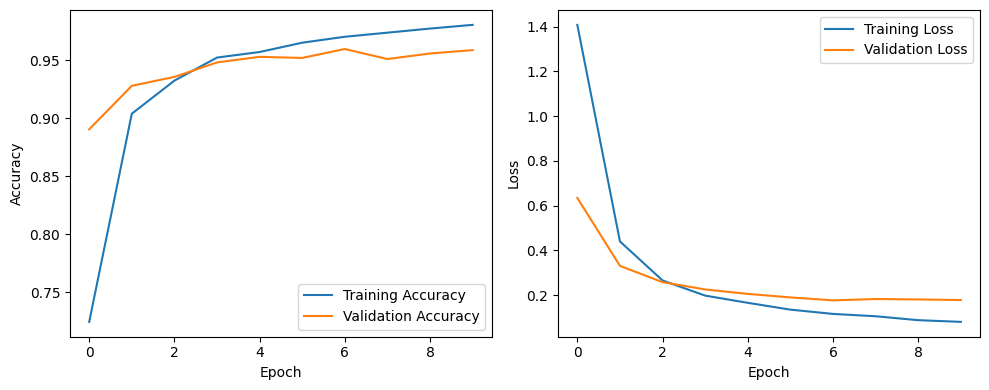

In [10]:
# Plot accuracy and loss during training
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
model.save("models/reduced_data_embeddings.h5")